<a href="https://colab.research.google.com/github/ParmveerN/Heart-health-analysis/blob/master/visuals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import math as ma
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
import os

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv('/content/drive/My Drive/data-science/heart-disease-project/heart.csv')

In [ ]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


First 10 data results

In [ ]:
df.tail(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3,0
294,44,1,0,120,169,0,1,144,1,2.8,0,0,1,0
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


Last 10 data results

In [ ]:
people_with_disease = len(df[df.target == 1])

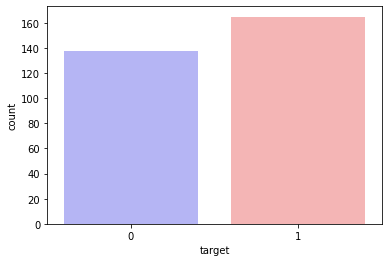

In [ ]:
sns.countplot(x="target", data=df, palette="bwr")
plt.show()

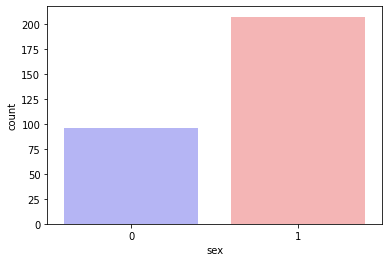

In [ ]:
sns.countplot(x ="sex", data=df, palette="bwr" )

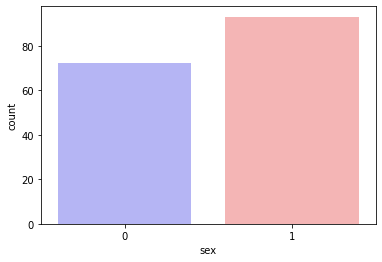

In [ ]:
sns.countplot( x="sex", data=df[df['target'] == 1],  palette="bwr")

In [ ]:
df.age.value_counts()[:10]

58    19
57    17
54    16
59    14
52    13
51    12
62    11
44    11
60    11
56    11
Name: age, dtype: int64

data age show value counts for at least 10 people

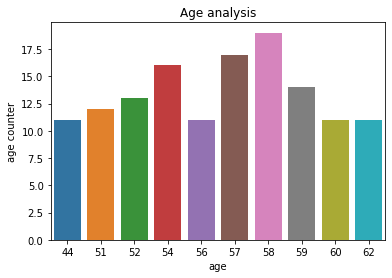

In [ ]:
sns.barplot(x=df.age.value_counts()[:10].index,y=df.age.value_counts()[:10].values)
plt.xlabel('age')
plt.ylabel('age counter')
plt.title('Age analysis')
plt.show()

graph showing variance of ages in the data


In [ ]:
min_age = np.min(df.age)
max_age = np.max(df.age)
mean_age = np.mean(df.age)
young_age_data = df[(df['age'] >=29) & (df['age'] <40)]
mid_age_data = df[(df['age'] >=40) & (df['age'] <55)]
old_age_data = df[(df['age'] >=55)]
print('minium age:',min_age)
print('max age:', max_age)
print('mean age:', mean_age)
print('number of young people', len(young_age_data))
print('number of middle age people', len(mid_age_data))
print('number of old people', len(old_age_data))

minium age: 29
max age: 77
mean age: 54.366336633663366
number of young people 16
number of middle age people 128
number of old people 159


Age results 

<function matplotlib.pyplot.show>

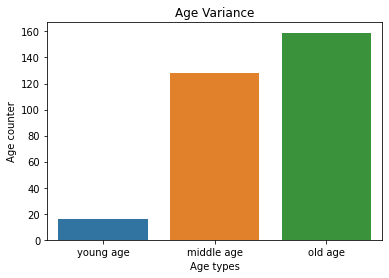

In [ ]:
sns.barplot(x=['young age', 'middle age', 'old age'], y= [len(young_age_data), len(mid_age_data), len(old_age_data)])
plt.xlabel('Age types')
plt.ylabel('Age counter')
plt.title('Age Variance')
plt.show

graph showing difference groups of age

In [ ]:
df['AgeRange']=0
youngAge_index = df[(df.age>=29)&(df.age<40)].index

middleAge_index = df[(df.age>=40)&(df.age<55)].index

oldAge_index = df[(df.age>=55)].index

In [ ]:
df.loc[0, 'AgeRange'] = 1

In [ ]:
for index in oldAge_index: df.loc[index, 'AgeRange']=2
for index in middleAge_index: df.loc[index, 'AgeRange']=1
for index in youngAge_index: df.loc[index, 'AgeRange']=0

In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,AgeRange
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,2
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,2
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,1
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,2
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,2


<function matplotlib.pyplot.show>

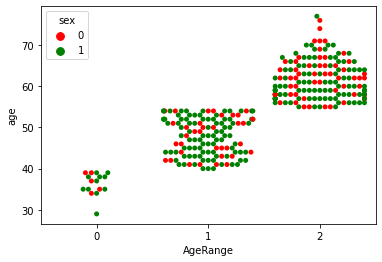

In [ ]:
sns.swarmplot(x="AgeRange", y="age", hue="sex", palette=["r","g","y"], data=df)
plt.show

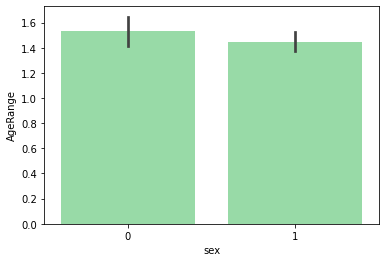

In [ ]:
sns.set_color_codes("pastel")
sns.barplot(y="AgeRange", x="sex", data=df, label="Total", color="g")
plt.show()

In [ ]:
low_chol = len(df[(df.chol <= 170)])
mid_chol = len(df[(df.chol >170)&(df.chol <= 199)])
high_chol = len(df[df.chol > 200])

In [ ]:
print("number of people with low chol", (low_chol))
print("number of people with borderline chol", (mid_chol))
print("number of people with high chol", (high_chol))

number of people with low chol 12
number of people with borderline chol 38
number of people with high chol 252


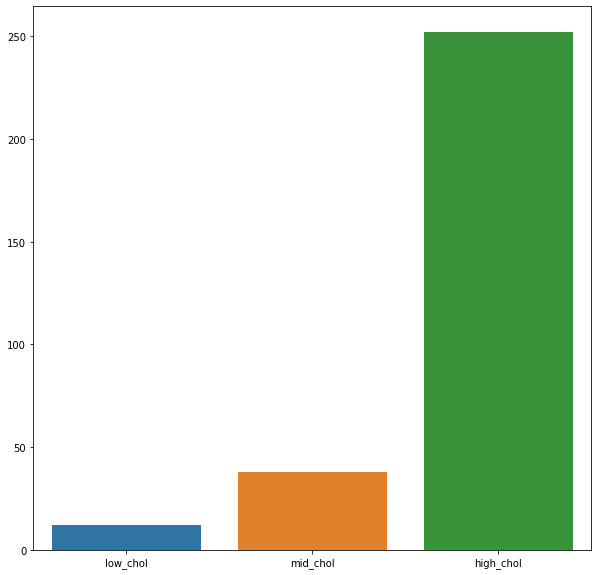

In [ ]:
plt.figure(figsize=(10, 10))
sns.barplot(x=['low_chol', 'mid_chol', 'high_chol'], y=[low_chol, mid_chol, high_chol])
plt.show()

In [ ]:
def find_chol_category(x):
  if x <= 170:
    return "Low Chol"
  elif x > 170 and x <= 199:
    return "Mid Chol"
  elif x > 199:
    return "High Chol"

df['chol_group'] = df['chol'].apply(find_chol_category)

In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,AgeRange,chol_group,above_max_heart_rate
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,2,High Chol,not high
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0,High Chol,high
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,1,High Chol,not high
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,2,High Chol,high
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,2,High Chol,not high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,2,High Chol,not high
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,1,High Chol,not high
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,2,Mid Chol,not high
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,2,Low Chol,not high


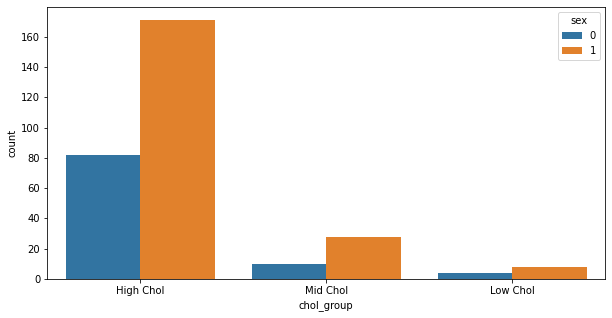

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x ="chol_group", data=df, hue='sex')
plt.show()

In [ ]:
male_with_target = len(df[(df.sex == 1)&(df.target == 1)])
female_with_target = len(df[(df.sex == 0)&(df.target == 1)])

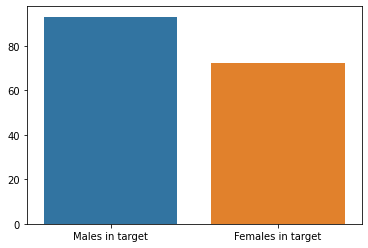

In [ ]:
sns.barplot(x = ['Males in target', 'Females in target'], y = [male_with_target, female_with_target])
plt.show()

In [ ]:
def find_thalach_category(x):
  # x[0] -> means age
  # x[1] -> means thalach
  if ((x[0] >=25 and x[0]<=27) and (x[1] >=200)):
    return "high"
  elif (x[0] >=28 and x[0]<=33) and (x[1] >=190):
    return "high"
  elif (x[0] >=34 and x[0]<=37) and (x[1] >=185):
    return "high"
  elif (x[0] >=38 and x[0]<=43) and (x[1] >=180):
    return "high"
  elif (x[0] >=44 and x[0]<=47) and (x[1] >=175):
    return "high"
  elif (x[0] >=48 and x[0]<=53) and (x[1] >=170):
    return "high"
  elif (x[0] >=54 and x[0]<=57) and (x[1] >=165):
    return "high"
  elif (x[0] >=58 and x[0]<=63) and (x[1] >=160):
    return "high"
  elif (x[0] >=64 and x[0]<=67) and (x[1] >=155):
    return "high"
  elif (x[0] >=68 and x[0]<=73) and (x[1] >=150):
    return "high"
  elif (x[0] >=74 and x[0]<=77) and (x[1] >=145):
    return "high"
  else:
    return "not high"
df['above_max_heart_rate'] = df[['age', 'thalach']].apply(find_thalach_category, axis=1)

In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,AgeRange,chol_group,above_max_heart_rate
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,2,High Chol,not high
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0,High Chol,high
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,1,High Chol,not high
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,2,High Chol,high
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,2,High Chol,not high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,2,High Chol,not high
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,1,High Chol,not high
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,2,Mid Chol,not high
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,2,Low Chol,not high


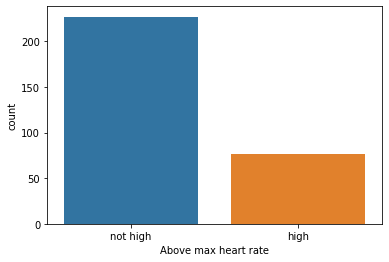

In [ ]:
sns.countplot(x="Above max heart rate", data=df)
plt.show()

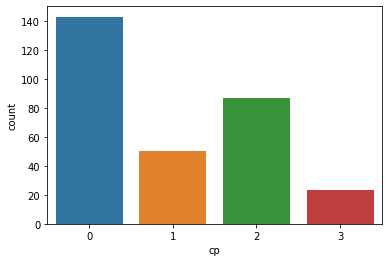

In [ ]:
#cp of 0 means they are typical angina
#cp of 1 means they are a atypical angina
#cp of 2 means they are a non-anginal pain
#cp of 3 mean they are asymptomatic 
sns.countplot(x='cp',data=df)
plt.show()

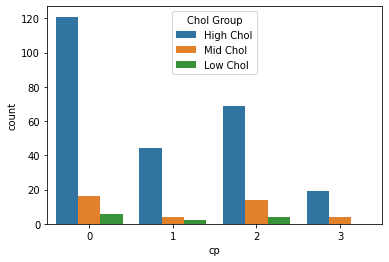

In [ ]:
sns.countplot(x='cp',data=df, hue='Chol Group')
plt.show()

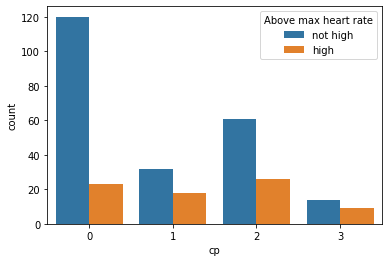

In [ ]:
sns.countplot(x='cp',data=df, hue='Above max heart rate')
plt.show()

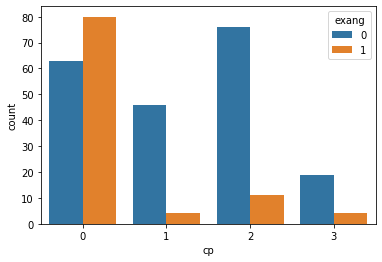

In [ ]:
sns.countplot(x='cp',data=df, hue='exang')
plt.show()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,AgeRange,chol_group,above_max_heart_rate
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,2,High Chol,not high
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0,High Chol,high
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,1,High Chol,not high
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,2,High Chol,high
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,2,High Chol,not high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,2,High Chol,not high
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,1,High Chol,not high
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,2,Mid Chol,not high
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,2,Low Chol,not high


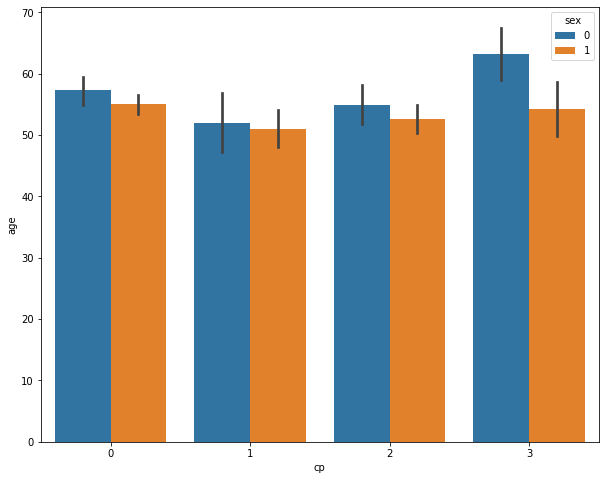

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x="cp", y="age", hue="sex", data=df)
plt.show()